In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston=load_boston()
data=boston['data'][0:400,]
label=boston['target'][0:400,]

testdata=boston['data'][400:506]
testlabel=boston['target'][400:506]

In [30]:
class NeuralNet(object):
    def __init__(self,eta=0.1,batchsize=1,epoch=5,eps=1e-5,inputsize=1,outputsize=1):
        self.eta=eta
        self.W=np.zeros((inputsize,outputsize))
        self.B=np.zeros((1,outputsize))
        self.batchsize=batchsize
        self.epoch=epoch
        self.eps=eps
        self.inputsize=inputsize
        self.outputsize=outputsize
        self.loss=[]
        self.xmax=0
        self.xmin=0
        self.ymax=0
        self.ymin=0
    def __forword(self,X):
        Z=np.dot(X,self.W)+self.B
        return Z
    def __backword(self,X,Y,Z):
        dZ=Z-Y.reshape((self.batchsize,1))
        dB=dZ.sum(axis=0,keepdims=True)/self.batchsize
        dW=np.dot(X.T,dZ)/self.batchsize
        return dW,dB
    def __update(self,dW,dB):
        self.W=self.W-dW*self.eta
        self.B=self.B-dB*self.eta
    def trainwithoutnor(self,data,label):
        for i in range(int(len(data)*self.epoch/self.batchsize)):
            I=int(i*self.batchsize%len(data))
            X=np.array(data[I:I+self.batchsize])
            Y=np.array(label[I:I+self.batchsize])
            Z=self.__forword(X)
            Loss=((Z-Y)**2).sum()/self.batchsize/2
            self.loss.append(Loss)
            if Loss>self.eps:
                dw,db=self.__backword(X,Y,Z)
                self.__update(dw,db)
    def train(self,data,label):
        self.__getxmaxandmin(data)
        self.__getymaxandmin(label)
        for i in range(int(len(data)*self.epoch/self.batchsize)):
            I=int(i*self.batchsize%len(data))
            X1=np.array(data[I:I+self.batchsize])
            X=self.nomornalize(self.xmax,self.xmin,X1)
            Y1=np.array(label[I:I+self.batchsize])
            Y=self.nomornalize(self.ymax,self.ymin,Y1)
            Z=self.__forword(X)
            Loss=((Z-Y)**2).sum()/self.batchsize/2
            self.loss.append(Loss)
            if Loss>self.eps:
                dw,db=self.__backword(X,Y,Z)
                self.__update(dw,db)
    def __getxmaxandmin(self,data):
        self.xmax=np.amax(data,axis=0)
        self.xmin=np.amin(data,axis=0)
    def __getymaxandmin(self,data):
        self.ymax=np.max(data)
        self.ymin=np.min(data)
    def nomornalize(self,max,min,x):
        return (x-min)/(max-min)
    def denomornalize(self,max,min,x):
        return x*(max-min)+min
    def inferencewithoutnor(self,X):
        if X.shape[0]!=1:
            nomornalz=X*self.W+self.B
        else:
            nomornalz=np.dot(X,self.W)+self.B
        return nomornalz
    def inference(self,X):
        if X.shape[0]!=1:
            nomornalz=X*self.W+self.B
        else:
            nomornalz=np.dot(X,self.W)+self.B
        return self.denomornalize(self.ymax,self.ymin,nomornalz)

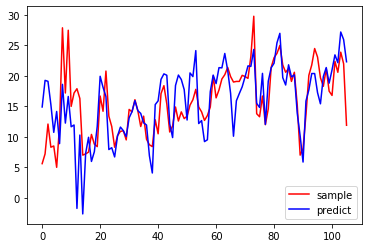

In [53]:
net1=NeuralNet(inputsize=13,epoch=1000,batchsize=100,eta=0.01)
net1.train(data,label)
#plt.plot(net1.loss)
p1,=plt.plot(testlabel,c='r')
results=np.zeros((106,1))
for i in range(106):
    x=net1.nomornalize(net1.xmax,net1.xmin,testdata[i]).reshape((1,13))
    results[i]=net1.inference(x)
p2,=plt.plot(results,c='b')
plt.legend([p1,p2],['sample','predict'])
    